# Statistical Data for the dataset

In [51]:
pwd = './'

In [52]:
import numpy as np
from PIL import Image
from matplotlib import cm
import os
from torch.utils import data
from torch.utils.data import Dataset, dataset
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
from pathlib import Path 
from tqdm import tqdm
from numpy import asarray
from numpy import save
import json
import torch

import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T
import librosa
import torch.nn as nn

In [53]:
pwd = './'
wav_dir = pwd + "225D_DataSet/wav_files/"
npy_dir = pwd + "225D_DataSet/npy/"
json_dir = pwd + "225D_DataSet/json/"
txt_dir = pwd + "225D_DataSet/txt/"
label_dir = pwd + "225D_DataSet/label/"

## 1 Age Group

In [54]:
from collections import defaultdict

age_group_data = defaultdict(int)
age_data = []
for file in tqdm(os.listdir(label_dir)):
    label_path = os.path.join(label_dir, file)
    # normalize to [0,1]
    with open(label_path) as f:
        data = json.load(f)
        # get age
        age = data['age']
        age_data.append(age)
        # get age group
        age_group_data[data['age_group']] += 1 

100%|██████████| 27219/27219 [00:00<00:00, 27336.24it/s]


(array([3.000e+00, 5.000e+00, 1.600e+01, 2.400e+01, 6.300e+01, 9.800e+01,
        1.120e+02, 1.660e+02, 2.390e+02, 2.790e+02, 3.540e+02, 4.630e+02,
        5.240e+02, 6.030e+02, 6.470e+02, 7.140e+02, 7.190e+02, 9.680e+02,
        9.820e+02, 1.152e+03, 1.177e+03, 1.443e+03, 1.410e+03, 1.534e+03,
        1.297e+03, 1.213e+03, 1.074e+03, 9.550e+02, 7.930e+02, 6.800e+02,
        6.300e+02, 5.570e+02, 5.560e+02, 4.110e+02, 5.130e+02, 4.230e+02,
        3.320e+02, 3.940e+02, 3.030e+02, 3.390e+02, 2.720e+02, 2.380e+02,
        2.690e+02, 2.280e+02, 1.980e+02, 1.970e+02, 1.890e+02, 1.520e+02,
        1.450e+02, 1.350e+02, 1.270e+02, 9.900e+01, 1.020e+02, 6.700e+01,
        6.700e+01, 6.900e+01, 4.700e+01, 5.900e+01, 3.600e+01, 3.400e+01,
        2.600e+01, 3.100e+01, 2.600e+01, 2.400e+01, 2.100e+01, 2.500e+01,
        1.600e+01, 2.400e+01, 1.800e+01, 2.100e+01, 4.000e+00, 8.000e+00,
        5.000e+00, 8.000e+00, 6.000e+00, 6.000e+00, 5.000e+00, 5.000e+00,
        5.000e+00, 4.000e+00, 6.000e+0

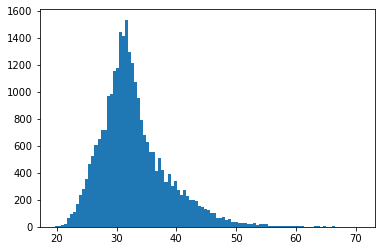

In [55]:
plt.hist(age_data, bins=100)

<BarContainer object of 10 artists>

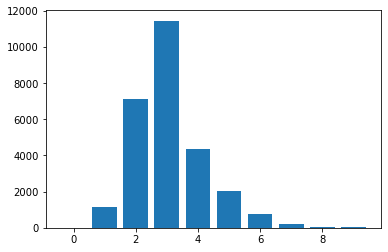

In [56]:
plt.bar(age_group_data.keys(), age_group_data.values())

## 2 Gender

100%|██████████| 27219/27219 [00:01<00:00, 26011.83it/s]


([<matplotlib.patches.Wedge at 0x7f64ec9c9210>,
 [Text(-0.39455434475510787, 1.0268042018977463, 'male'),
  Text(0.39455434475510776, -1.0268042018977463, 'female')],
 [Text(-0.21521146077551337, 0.5600750192169525, '61.68%'),
  Text(0.21521146077551329, -0.5600750192169525, '38.32%')])

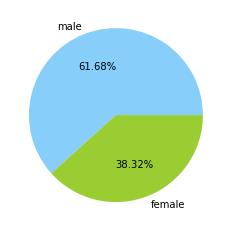

In [57]:
male = 0
female = 0
for file in tqdm(os.listdir(label_dir)):
    label_path = os.path.join(label_dir, file)
    with open(label_path) as f:
        data = json.load(f)
        # get gender
        gender = data['gender']
        if gender == 0:
            male += 1
        else:
            female += 1
plt.pie([male, female], 
        labels=["male", "female"],
        autopct = '%3.2f%%',
        colors=['lightskyblue', 'yellowgreen']
       )

## 3 Emotions

In [58]:
emotion2class = {"angry": 0, "disgust": 1, "fear": 2, "happy": 3, "neutral": 4, "sad": 5, "surprise": 6}
race2class = {"asian": 0, "black": 1, "indian": 2, "latino hispanic": 3, 'middle eastern': 4, 'white': 5}

In [59]:
### 3.1 Overall

100%|██████████| 27219/27219 [00:00<00:00, 29119.18it/s]


<BarContainer object of 7 artists>

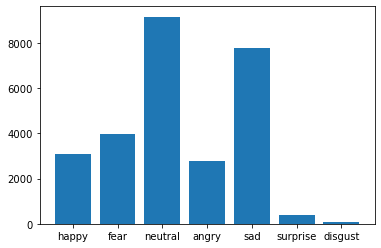

In [60]:
dominant_emotions = defaultdict(int)
class2emotion = {0:"angry", 1:"disgust", 2:"fear", 3:"happy", 4:"neutral", 5:"sad", 6:"surprise"}

for file in tqdm(os.listdir(label_dir)):
    label_path = os.path.join(label_dir, file)
    with open(label_path) as f:
        data = json.load(f)
        # get dominant emotion
        emotion = data['emotion']
        dominant_emotions[class2emotion[emotion]] += 1
plt.bar(dominant_emotions.keys(), dominant_emotions.values())


In [70]:
total = 0
for cls in dominant_emotions:
    total += dominant_emotions[cls]
for cls in dominant_emotions:
    print(cls + ': ' + "{:.2f}".format(dominant_emotions[cls] / total))

happy: 0.11
fear: 0.15
neutral: 0.34
angry: 0.10
sad: 0.29
surprise: 0.01
disgust: 0.00


### 3.2 Individual

  0%|          | 3/27220 [00:00<04:56, 91.87it/s]


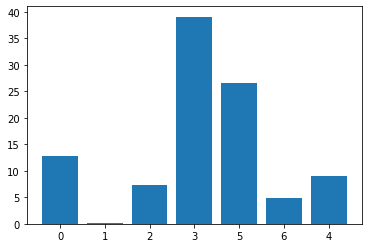

In [61]:
id = 3
cnt = 0
for file in tqdm(os.listdir(json_dir)):
    if cnt == id:
        json_path = os.path.join(json_dir, file)
        with open(json_path) as f:
            data = json.load(f)
            # get dominant emotion
            emotion = data['emotion']
            plt.bar(emotion.keys(), emotion.values())
        break
    else:
        cnt += 1
        continue

## 4 Race